# Problem & Data Overview

# Import Libraries

In [5]:
!pip install ultralytics
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [6]:
!pip install paddleocr
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.6 MB/s eta 0:00:00:00:01
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=5b459980e346feae80dacfbccd7e8a91459e5f2a38a9cf645b47a8e096c67428
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 9.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstallin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
import os
import shutil
import yaml
import warnings

In [3]:
import wandb
import random

import cv2
from PIL import Image

In [8]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
import easyocr

# Data Load & Explore

In [10]:
# Paths to your dataset (images and labels)
images_path = '/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles'
labels_path = '/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles Labeling'

image_files = sorted(os.listdir(images_path))
label_files = sorted(os.listdir(labels_path))

# Utility Functions

Image Shape: (734, 720, 3)


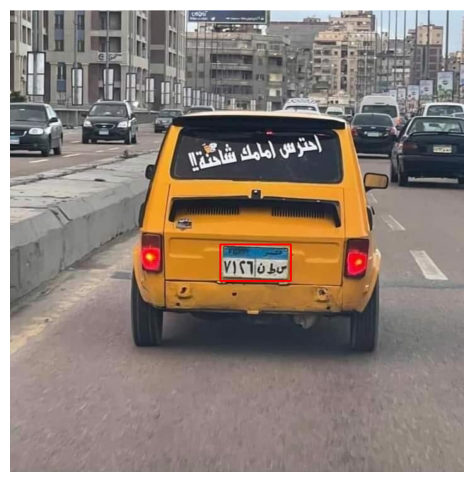

In [11]:
# Function to load bounding boxes from the label file
def load_bounding_boxes(label_file):
    bounding_boxes = []
    with open(label_file, 'r') as file:
        for line in file.readlines():
            values = line.strip().split()
            class_id = int(values[0])  # Class ID (optional if needed)
            x_center = float(values[1])
            y_center = float(values[2])
            width = float(values[3])
            height = float(values[4])
            bounding_boxes.append([x_center, y_center, width, height])
    return bounding_boxes

# Function to draw bounding boxes on the image
def draw_bounding_boxes(image, bounding_boxes):
    h, w = image.shape[:2]
    for bbox in bounding_boxes:
        x_center, y_center, box_width, box_height = bbox
        # Convert YOLO format to corner coordinates
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)
        # Draw the rectangle on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image

# Function to display image with bounding boxes
def plot_image_with_boxes(image_file, label_file):
    # Load the image
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib
    
    # Print the shape of the image
    print(f"Image Shape: {image.shape}")
    
    # Load bounding boxes from the corresponding label file
    bounding_boxes = load_bounding_boxes(label_file)
    
    # Draw bounding boxes on the image
    image_with_boxes = draw_bounding_boxes(image, bounding_boxes)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(8, 6))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()

# List all images and labels
image_files = sorted(os.listdir(images_path))
label_files = sorted(os.listdir(labels_path))

# Plot a sample image with bounding boxes
sample_index = 0  # Change this to view a different sample
sample_image_file = os.path.join(images_path, image_files[sample_index])
sample_label_file = os.path.join(labels_path, label_files[sample_index])

plot_image_with_boxes(sample_image_file, sample_label_file)

Image Shape: (734, 720, 3)


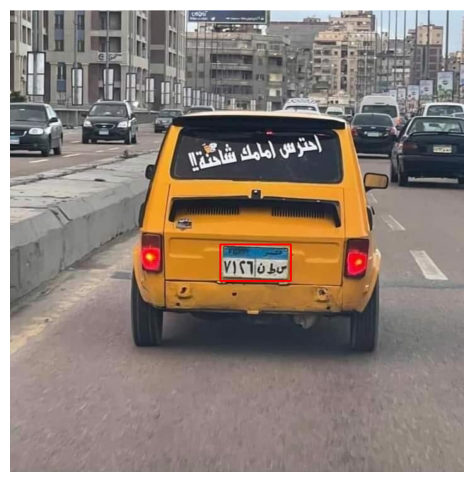

Image Shape: (480, 640, 3)


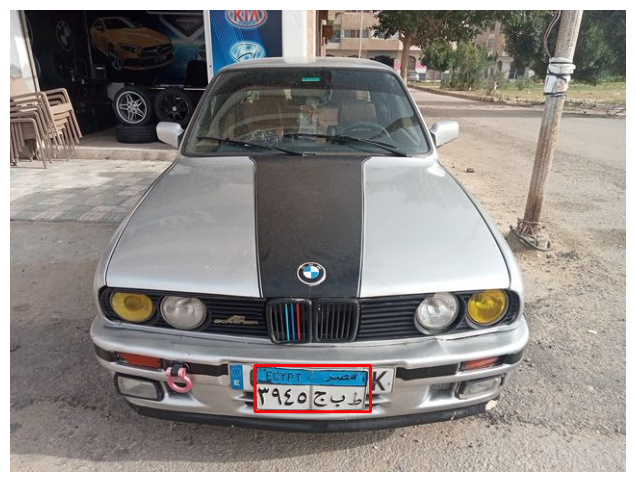

In [12]:
for sample_index in range (2):
    sample_image_file = os.path.join(images_path, image_files[sample_index])
    sample_label_file = os.path.join(labels_path, label_files[sample_index])

    plot_image_with_boxes(sample_image_file, sample_label_file)

# Preprocess Image

In [13]:
# Function to preprocess the input image
def preprocess_image(image_path, target_size=(640, 640)):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize image to target size (for YOLO or detection model)
    image_resized = cv2.resize(image, target_size)
    
    # Normalize the image (convert to float and scale between 0-1)
    image_normalized = image_resized / 255.0
    
    # Convert image to the format needed by the model (Batch, Height, Width, Channels)
    input_image = np.expand_dims(image_normalized, axis=0)  # Add batch dimension
    
    return input_image, image_resized

# Load bounding boxes from Labels Files

In [14]:
# Function to load bounding boxes from the label file (YOLO format)
def load_bounding_boxes(label_file):
    bounding_boxes = []
    with open(label_file, 'r') as file:
        for line in file.readlines():
            values = line.strip().split()
            class_id = int(values[0])  # Class ID (optional)
            x_center = float(values[1])
            y_center = float(values[2])
            width = float(values[3])
            height = float(values[4])
            bounding_boxes.append([x_center, y_center, width, height])
    return bounding_boxes

In [15]:
# Function to detect and crop the car plate using the bounding boxes
def detect_car_plate(image, bounding_boxes):
    h, w = image.shape[:2]
    for bbox in bounding_boxes:
        x_center, y_center, box_width, box_height = bbox
        # Convert YOLO format to corner coordinates
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)
        cropped_plate = image[y1:y2, x1:x2]  # Crop the detected car plate
        return cropped_plate
    return None

In [16]:
# Function to draw bounding boxes on the image
def draw_bounding_boxes(image, bounding_boxes):
    h, w = image.shape[:2]
    for bbox in bounding_boxes:
        x_center, y_center, box_width, box_height = bbox
        # Convert YOLO format to corner coordinates
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)
        # Draw the rectangle on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image

# Crop Images

In [17]:
# Function to crop the car plate from the uploaded image
def crop_Plate(yolo_model, img):
    model = YOLO(yolo_model)
    count = 0

    # Perform prediction on the image
    results = model.predict(source=img, conf=0.25)

    # Open the image
    image = Image.open(img)

    for result in results:
        if result.boxes is not None and len(result.boxes) > 0:
            max_width = -1
            selected_box = None

            # Iterate through all detected boxes to find the one with the maximum width
            for box in result.boxes:
                res = box.xyxy[0]  # Get the coordinates of the bounding box
                width = res[2].item() - res[0].item()  # Calculate width (x_max - x_min)

                if width > max_width:
                    max_width = width
                    selected_box = res  # Store the coordinates of the selected box

            if selected_box is not None:
                x_min = selected_box[0].item()
                y_min = selected_box[1].item()
                x_max = selected_box[2].item()
                y_max = selected_box[3].item()

                # Crop the image using the bounding box coordinates
                cropped_image = image.crop((x_min, y_min, x_max, y_max))
#                 resized_cropped_image = cropped_image.resize((150, 150))
        
#                 open_cv_image = np.array(cropped_image)
#                 open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2BGR)

#         # Convert to grayscale
#                 gray_image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)

#         # Apply edge detection (Canny edge detection)
#                 edges = cv2.Canny(gray_image, 80, 220)
#                 plt.imshow(edges)

#                 # Convert the PIL image to a NumPy array
#                 resized_cropped_image_np = np.array(cropped_image)
#                 denoised_image = cv2.fastNlMeansDenoisingColored(resized_cropped_image_np, None, 10, 10, 10, 21)
#                 # Convert the sharpened NumPy array back to a PIL image if needed
#                 final_image = Image.fromarray(denoised_image)

                return cropped_image
        else:
            print("No bounding boxes detected.")
    return None


image 1/1 /kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles/0010.jpg: 608x288 1 plate, 47.2ms
Speed: 7.5ms preprocess, 47.2ms inference, 495.6ms postprocess per image at shape (1, 3, 608, 288)


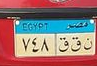

In [18]:
yolo_model = '/kaggle/input/egyptian-plate-cars-recognizer/polo.pt'

resize_image = crop_Plate(yolo_model,
                          "/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles/0010.jpg")

resize_image


image 1/1 /kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles/0120.jpg: 640x384 1 car_plate, 45.6ms
Speed: 1.8ms preprocess, 45.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 384)


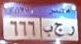

In [19]:
yolo_model = '/kaggle/input/yolos/other/default/1/yolo11m_car_plate_trained.pt'

resize_image1 = crop_Plate(yolo_model,
                          "/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles/0120.jpg")

resize_image1


image 1/1 /kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles/0555.jpg: 480x640 1 car_plate, 55.8ms
Speed: 2.0ms preprocess, 55.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


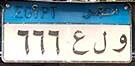

In [20]:
yolo_model = '/kaggle/input/yolos/other/default/1/yolo_car_plate_trained.pt'

resize_image2 = crop_Plate(yolo_model,
                          "/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles/0555.jpg")

resize_image2

# OCR

In [21]:
def detect_text(cropped_image):
    """
    This function takes an image path, performs OCR using EasyOCR, and returns the detected text.
    It also displays the image with bounding boxes around detected text.
    
    :param image_path: str, Path to the image file
    :return: list of tuples (detected_text, confidence)
    """

    ## Convert the PIL image to OpenCV format
    image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2BGR)
#     image = cropped_image
    if image.dtype != 'uint8':
        image = (image * 255).astype('uint8')

    # Create an EasyOCR reader for Arabic
    reader = easyocr.Reader(['ar'], gpu=True)  # Set gpu=True if you have a GPU

    # Perform OCR
    results = reader.readtext(image)

    # Prepare a list to store detected text with confidence
    detected_texts = []

    # Extract and display results
    for (bbox, text, prob) in results:
        detected_texts.append((text, prob))
        print(f"Detected text: {text} with confidence {prob}")

    # Display the image with bounding boxes
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Display the image
    print(image.shape)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return detected_texts

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected text: '٥6٢٥٦  with confidence 0.16453271263035638
Detected text: نقق with confidence 0.5135034590355507
(66, 97, 3)


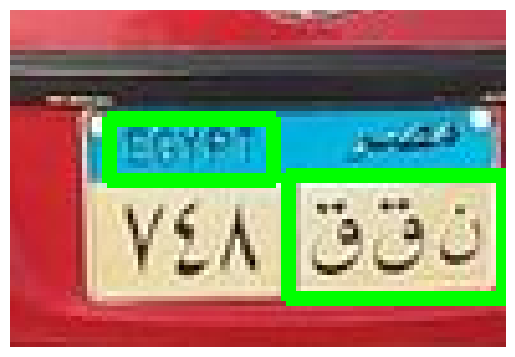

In [22]:
text = detect_text(resize_image)

(44, 81, 3)


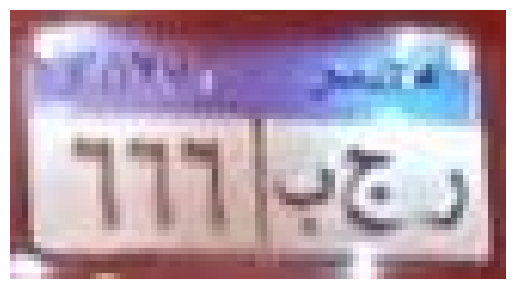

In [23]:
text1 = detect_text(resize_image1)

Detected text: ول٤ ٦٦٦ with confidence 0.47219502148082915
(66, 135, 3)


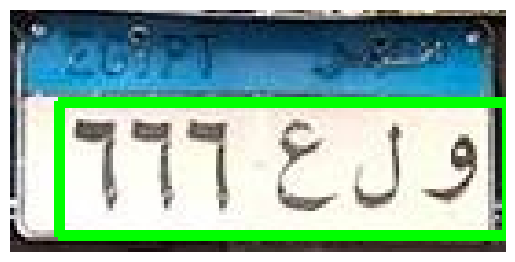

In [24]:
text2 = detect_text(resize_image2)

# OCR DATA

In [25]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mjwp7AfriOai3kmTWq9h")
project = rf.workspace("alyalsayed-vyx6g").project("egyptian-car-plates")
version = project.version(13)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sigstore 3.6.1 requires rich~=13.0, but you have rich 14.0.0 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=


Extracting Dataset Version Zip to egyptian-car-plates-13 in yolov11:: 100%|██████████| 12676/12676 [00:01<00:00, 11423.48it/s]


In [31]:
import os
import gc
import torch



# استدعاء YOLOv8
from ultralytics import YOLO

# تحميل نموذج خفيف (nano مناسب لحجم الذاكرة)
model_ocr = YOLO("yolov8n.pt")
model_ocr.to(device)

# تدريب النموذج
model_ocr.train(
    data='/kaggle/working/egyptian-car-plates-13/data.yaml',
    epochs=20,
    imgsz=416,   # تقليل حجم الصورة لتقليل استهلاك الذاكرة
    batch=4      # تقليل حجم الباتش لتقليل الضغط على الذاكرة
)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/egyptian-car-plates-13/data.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=416, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8

train: Scanning /kaggle/working/egyptian-car-plates-13/train/labels... 5216 images, 4 backgrounds, 0 corrupt: 100%|██████████| 5216/5216 [00:03<00:00, 1344.37it/s]


train: New cache created: /kaggle/working/egyptian-car-plates-13/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.9±1.0 MB/s, size: 9.0 KB)


val: Scanning /kaggle/working/egyptian-car-plates-13/valid/labels... 745 images, 0 backgrounds, 0 corrupt: 100%|██████████| 745/745 [00:00<00:00, 1320.21it/s]

val: New cache created: /kaggle/working/egyptian-car-plates-13/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000238, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.385G      1.716      3.825      1.387         37        416: 100%|██████████| 1304/1304 [01:32<00:00, 14.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:06<00:00, 13.53it/s]


                   all        745       3894      0.329      0.428      0.356      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.391G      1.606      2.226      1.352         17        416: 100%|██████████| 1304/1304 [01:26<00:00, 15.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.92it/s]


                   all        745       3894      0.702      0.801      0.805      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.391G      1.542      1.734      1.336         33        416: 100%|██████████| 1304/1304 [01:26<00:00, 15.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:05<00:00, 18.01it/s]

                   all        745       3894      0.849      0.904       0.92      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.391G      1.499      1.491      1.319         36        416: 100%|██████████| 1304/1304 [01:24<00:00, 15.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.91it/s]


                   all        745       3894      0.924      0.937      0.972      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.391G      1.465       1.36      1.305         40        416: 100%|██████████| 1304/1304 [01:25<00:00, 15.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.96it/s]


                   all        745       3894      0.937      0.952      0.979      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.391G      1.443      1.274      1.302         24        416: 100%|██████████| 1304/1304 [01:25<00:00, 15.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.84it/s]

                   all        745       3894      0.966      0.956      0.982      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.391G      1.409      1.196      1.289         26        416: 100%|██████████| 1304/1304 [01:24<00:00, 15.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.97it/s]

                   all        745       3894      0.976      0.972      0.985      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.391G      1.402      1.152      1.288         57        416: 100%|██████████| 1304/1304 [01:24<00:00, 15.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.26it/s]

                   all        745       3894      0.972      0.974      0.986      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.391G      1.388      1.102      1.281         20        416: 100%|██████████| 1304/1304 [01:24<00:00, 15.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.37it/s]

                   all        745       3894      0.972      0.974      0.986      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.391G      1.375      1.074      1.274         21        416: 100%|██████████| 1304/1304 [01:24<00:00, 15.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.13it/s]


                   all        745       3894      0.975      0.977      0.986      0.639
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.391G      1.319     0.8484      1.312         19        416: 100%|██████████| 1304/1304 [01:24<00:00, 15.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:05<00:00, 18.12it/s]

                   all        745       3894      0.973      0.978      0.986      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.391G      1.298     0.8059      1.302         17        416: 100%|██████████| 1304/1304 [01:23<00:00, 15.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.99it/s]

                   all        745       3894      0.981       0.98      0.987       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.391G      1.285     0.7779        1.3         23        416: 100%|██████████| 1304/1304 [01:25<00:00, 15.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.82it/s]

                   all        745       3894      0.982      0.983      0.988       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.391G      1.279      0.764      1.298         22        416: 100%|██████████| 1304/1304 [01:25<00:00, 15.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.14it/s]


                   all        745       3894      0.978      0.983      0.987      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.391G      1.269     0.7479       1.29         23        416: 100%|██████████| 1304/1304 [01:23<00:00, 15.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.55it/s]

                   all        745       3894      0.984      0.985      0.989      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.391G      1.261     0.7293      1.283         25        416: 100%|██████████| 1304/1304 [01:23<00:00, 15.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.17it/s]

                   all        745       3894      0.982      0.985      0.989      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.391G      1.253     0.7173       1.28         17        416: 100%|██████████| 1304/1304 [01:22<00:00, 15.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.79it/s]


                   all        745       3894      0.981      0.983      0.988      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.391G      1.242      0.705      1.272         25        416: 100%|██████████| 1304/1304 [01:22<00:00, 15.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.93it/s]

                   all        745       3894      0.981      0.987      0.989      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.391G       1.24     0.6999      1.273         19        416: 100%|██████████| 1304/1304 [01:23<00:00, 15.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.91it/s]

                   all        745       3894      0.983      0.988      0.989      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.391G      1.231       0.69      1.264         20        416: 100%|██████████| 1304/1304 [01:24<00:00, 15.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:05<00:00, 18.41it/s]

                   all        745       3894      0.983      0.987      0.989      0.657



20 epochs completed in 0.502 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,013,058 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:05<00:00, 17.83it/s]


                   all        745       3894      0.983      0.987      0.989      0.657
                     0        107        116      0.937      0.901      0.912      0.402
                     1        214        309      0.986      0.987      0.988      0.544
                     2        152        199      0.989       0.99      0.993      0.639
                     3        137        186      0.978      0.995      0.988      0.643
                     4        144        200      0.985      0.994      0.988      0.617
                     5        137        204          1      0.994      0.995      0.627
                     6        155        244      0.973      0.971      0.992      0.644
                     7        139        189      0.989      0.995      0.995       0.67
                   7aa         48         49      0.975          1      0.995      0.663
                     8        151        192      0.978       0.99      0.976      0.632
                     

invalid value encountered in less
invalid value encountered in less


Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798f7984d050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,  

In [32]:
model_ocr.val()

Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,013,058 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 300.4±94.6 MB/s, size: 9.6 KB)


val: Scanning /kaggle/working/egyptian-car-plates-13/valid/labels.cache... 745 images, 0 backgrounds, 0 corrupt: 100%|██████████| 745/745 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 187/187 [00:05<00:00, 32.45it/s]


                   all        745       3894      0.983      0.987      0.989      0.657
                     0        107        116      0.937      0.901      0.912      0.402
                     1        214        309      0.986      0.987      0.988      0.545
                     2        152        199      0.989       0.99      0.993      0.638
                     3        137        186      0.978      0.995      0.987      0.644
                     4        144        200      0.985      0.994      0.989      0.614
                     5        137        204          1      0.994      0.995      0.628
                     6        155        244      0.973      0.971      0.992      0.644
                     7        139        189      0.989      0.995      0.995      0.671
                   7aa         48         49      0.975          1      0.995      0.667
                     8        151        192      0.977       0.99      0.976      0.632
                     

invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798f6b45fe50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,  

In [36]:
model_ocr.save('yolo11m_car_plate_ocr1.pt')# # After training, save the model


0: 256x416 3 6s, 1 baa, 1 jeem, 1 raa, 39.5ms
Speed: 1.0ms preprocess, 39.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 416)


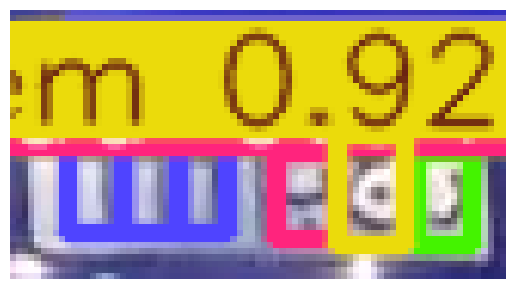

In [34]:
result = model_ocr.predict(source=resize_image1, conf=0.25)

import matplotlib.pyplot as plt

# Assuming 'result' contains the predictions and the image
predicted_image = result[0].plot()  # Plotting the result image

# Display the image using Matplotlib
plt.imshow(predicted_image)
plt.axis('off')  # Hide the axis
plt.show()

In [35]:
# Assuming 'result' is the output from the model
detected_numbers = []
detected_letters = []

# Accessing the detected boxes from the 'result'
boxes = result[0].boxes

# Loop through each detected box
for box in boxes:
    # 'box.cls' holds the class ID for each detected box
    class_id = int(box.cls)  # Convert the class ID to integer if needed

    # Look up the class ID in the 'names' dictionary to get the recognized text/number
    if class_id in result[0].names:
        recognized_text = result[0].names[class_id]

        # Check if the recognized text is a number or a letter and store accordingly
        if recognized_text.isdigit():  # If it's a digit, add to the numbers list
            detected_numbers.append(recognized_text)
        else:  # Otherwise, it's a letter, add to the letters list
            detected_letters.append(recognized_text)

# Print the detected numbers and letters, preserving their original order
print("Detected Numbers:", detected_numbers)
print("Detected Letters:", detected_letters)

Detected Numbers: ['6', '6', '6']
Detected Letters: ['jeem', 'baa', 'raa']


# Paddle

In [37]:
from paddleocr import PaddleOCR
def detect_text_with_paddleocr(cropped_image):
    """
    This function takes the path to an image, performs OCR using PaddleOCR, and returns the detected text.
    It also displays the image with bounding boxes around detected text.
    
    :param image_path: str, path to the input image
    :return: list of tuples (detected_text, confidence)
    """
    # Step 1: Initialize the PaddleOCR model for Arabic
    ocr = PaddleOCR(use_angle_cls=True, lang='ar')  # Arabic language

    # Step 2: Read the image using OpenCV
#     image = cv2.imread(image_path)
    image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2BGR)

    # Step 3: Perform OCR on the image
    results = ocr.ocr(image, cls=True)

    # Step 4: Prepare a list to store detected text with confidence
    detected_texts = []

    # Extract and display results
    for result in results:
        for (bbox, (text, prob)) in result:
            detected_texts.append((text, prob))
            print(f"Detected text: {text} with confidence {prob:.2f}")

            # Draw bounding boxes for detected text
            bbox = np.array(bbox).astype(int)
            cv2.polylines(image, [bbox], isClosed=True, color=(0, 255, 0), thickness=1)

    # Step 5: Display the processed image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
    plt.axis('off')
    plt.show()

    return detected_texts

No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md


[2025/05/01 14:17:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/arabic/arabic_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch

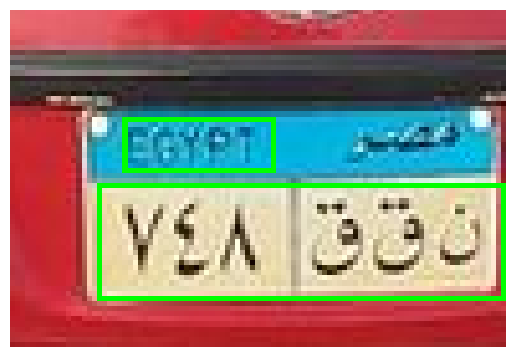

[('٥', 0.6703351736068726), ('٨٤٧  ق ق ن', 0.7696367502212524)]

In [41]:
detect_text_with_paddleocr(resize_image)

In [ ]:
# def classify_input_image(image):
#     # Simple logic based on aspect ratio to distinguish between full vehicle and plate image
#     height, width = image.shape[:2]
#     aspect_ratio = width / height
    
#     # If aspect ratio is close to that of a vehicle, it's a full car image
#     if aspect_ratio > 2.0:
#         return 'vehicle'
#     else:
#         return 'plate'
    
# # Example usage of decision logic
# image_path = "/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles/0007.jpg"
# image, image_resized = preprocess_image(image_path)

# # Classify whether the input is a full vehicle image or a plate
# image_type = classify_input_image(image_resized)

# if image_type == 'vehicle':
#     # Stage 1: Detect plate first, then recognize characters
#     plate_image = crop_Plate(yolo_model, image_resized)
#     if plate_image is not None:
#         detected_text = detect_text(plate_image)
# else:
#     # Stage 2: Directly recognize characters from the input plate image
#     detected_text = detect_text(image_resized)

# Combine Images and Labels

In [42]:
# Directories
label_dir = '/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles Labeling'
image_dir = '/kaggle/input/egyptian-cars-plates/EALPR Vechicles dataset/Vehicles'
working_dir = '/kaggle/working/combined_dataset'

# Create a writable directory in /kaggle/working
os.makedirs(working_dir, exist_ok=True)

# List all images and labels
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

# Copy the images and matching label files to the writable directory
for image_file in image_files:
    # Get the base filename without the extension (e.g., image1.jpg -> image1)
    base_name = os.path.splitext(image_file)[0]
    
    # Find the corresponding label file (e.g., image1.txt)
    label_file = f"{base_name}.txt"
    
    if label_file in label_files:
        # Copy the image and label file to the working directory
        shutil.copy(os.path.join(image_dir, image_file), os.path.join(working_dir, image_file))
        shutil.copy(os.path.join(label_dir, label_file), os.path.join(working_dir, label_file))
#         print(f"Copied {image_file} and {label_file} to {working_dir}")
    else:
        print(f"No label found for {image_file}")

print("Image and label files have been copied to the writable directory.")

Image and label files have been copied to the writable directory.


# Create Data for YOLO models

In [43]:
# Create the data dictionary
data_dict = {
    'train': "/kaggle/working/combined_dataset",  # Path to the training images
    'val': "/kaggle/working/combined_dataset",    # Use the same for validation; update if you have a separate validation set
    'nc': 1,             # Number of classes (adjust if you have more)
    'names': ['car_plate']  # Class names (adjust as needed)
}

# Specify the path for the YAML file
yaml_file_path = '/kaggle/working/car_plate_data.yaml'

# Write the dictionary to a YAML file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data_dict, yaml_file)

print(f"YAML file created at: {yaml_file_path}")

YAML file created at: /kaggle/working/car_plate_data.yaml


# fine-tune YOLO on data

## YOLOv9m

In [45]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')  # نموذج أخف

model.train(
    data='car_plate_data.yaml',
    epochs=20,
    batch=4,
    imgsz=416,
    cache=True,
    augment=True,
    visualize=False,
    name='yolo_car_plate')

Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=car_plate_data.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=416, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=yolo_car_plate, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

train: Scanning /kaggle/working/combined_dataset... 2030 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2031/2031 [00:01<00:00, 1449.38it/s]

train: /kaggle/working/combined_dataset/2018.jpg: ignoring corrupt image/label: image file is truncated (5 bytes not processed)


train: New cache created: /kaggle/working/combined_dataset.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.8GB RAM): 100%|██████████| 2030/2030 [00:08<00:00, 238.61it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 301.1±82.1 MB/s, size: 88.9 KB)


val: Scanning /kaggle/working/combined_dataset.cache... 2030 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2031/2031 [00:00<?, ?it/s]

train: /kaggle/working/combined_dataset/2018.jpg: ignoring corrupt image/label: image file is truncated (5 bytes not processed)


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 2030/2030 [00:08<00:00, 247.23it/s]


Plotting labels to runs/detect/yolo_car_plate/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_car_plate
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.365G      0.688      1.133     0.8813          4        416: 100%|██████████| 508/508 [00:37<00:00, 13.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:14<00:00, 17.83it/s]


                   all       2030       2083      0.987      0.981      0.993      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.387G     0.6246     0.6319      0.874          2        416: 100%|██████████| 508/508 [00:35<00:00, 14.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 19.82it/s]


                   all       2030       2083      0.977      0.974      0.987       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.387G     0.5886     0.5195     0.8722          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 19.69it/s]

                   all       2030       2083      0.977      0.978      0.992      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.387G     0.5458     0.4465     0.8654          2        416: 100%|██████████| 508/508 [00:33<00:00, 15.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.17it/s]


                   all       2030       2083      0.994      0.973      0.993      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.387G     0.5229     0.4119     0.8552          5        416: 100%|██████████| 508/508 [00:33<00:00, 15.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.00it/s]

                   all       2030       2083       0.99      0.982      0.993      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.387G     0.5019     0.3844     0.8512          2        416: 100%|██████████| 508/508 [00:33<00:00, 14.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.20it/s]

                   all       2030       2083      0.994      0.979      0.993      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.387G     0.4981     0.3719     0.8439          2        416: 100%|██████████| 508/508 [00:33<00:00, 14.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.03it/s]

                   all       2030       2083      0.991      0.988      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.387G     0.4666      0.363     0.8408          5        416: 100%|██████████| 508/508 [00:33<00:00, 15.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.25it/s]

                   all       2030       2083      0.994      0.984      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.387G     0.4646     0.3553     0.8391          3        416: 100%|██████████| 508/508 [00:34<00:00, 14.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.38it/s]

                   all       2030       2083      0.994      0.984      0.994      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.387G      0.435     0.3275     0.8346          2        416: 100%|██████████| 508/508 [00:33<00:00, 15.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.55it/s]


                   all       2030       2083      0.994      0.988      0.994      0.876
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.387G      0.594     0.3674     0.8487          2        416: 100%|██████████| 508/508 [00:33<00:00, 14.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.15it/s]


                   all       2030       2083      0.996      0.986      0.994      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.387G     0.5801     0.3559     0.8479          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.20it/s]

                   all       2030       2083      0.994      0.983      0.994      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.387G     0.5656     0.3451     0.8447          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 19.66it/s]

                   all       2030       2083      0.991      0.992      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.387G     0.5351     0.3255      0.832          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.06it/s]

                   all       2030       2083      0.993      0.991      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.387G     0.5377     0.3152     0.8334          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.05it/s]

                   all       2030       2083      0.996      0.989      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.387G     0.5258      0.304     0.8287          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 19.89it/s]

                   all       2030       2083      0.995       0.99      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.387G     0.5036     0.2918     0.8278          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.08it/s]


                   all       2030       2083      0.993      0.992      0.995      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.387G      0.489     0.2796     0.8273          2        416: 100%|██████████| 508/508 [00:34<00:00, 14.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.44it/s]


                   all       2030       2083      0.997      0.989      0.995      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.387G     0.4745     0.2654     0.8227          2        416: 100%|██████████| 508/508 [00:33<00:00, 14.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 19.84it/s]

                   all       2030       2083      0.991      0.994      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.387G     0.4688     0.2585     0.8225          3        416: 100%|██████████| 508/508 [00:34<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:12<00:00, 20.53it/s]

                   all       2030       2083      0.998       0.99      0.995      0.916



20 epochs completed in 0.263 hours.
Optimizer stripped from runs/detect/yolo_car_plate/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo_car_plate/weights/best.pt, 6.2MB

Validating runs/detect/yolo_car_plate/weights/best.pt...
Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:16<00:00, 15.37it/s]


                   all       2030       2083      0.996       0.99      0.995      0.905
Speed: 0.1ms preprocess, 4.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolo_car_plate


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798f713c9210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [46]:
# Validate the model
model.val()

Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1595.0±706.4 MB/s, size: 75.7 KB)


val: Scanning /kaggle/working/combined_dataset.cache... 2030 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2031/2031 [00:00<?, ?it/s]

train: /kaggle/working/combined_dataset/2018.jpg: ignoring corrupt image/label: image file is truncated (5 bytes not processed)


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 2030/2030 [00:08<00:00, 251.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 508/508 [00:20<00:00, 24.90it/s]


                   all       2030       2083      0.996       0.99      0.995      0.906
Speed: 0.1ms preprocess, 6.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/yolo_car_plate2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799026dde7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [47]:
# # After training, save the model
model.save('yolo_car_plate_trained.pt')

## YOLOv11m

In [50]:
import wandb
from ultralytics import YOLO

# تسجيل الدخول إلى wandb تلقائيًا
wandb.login(key="7a59ff18b1ff992ed3dfb8de032debc6610ba070")

# بدء تجربة جديدة على wandb
wandb.init(
    project="yolov11-car-plate",
    config={
        "learning_rate": 0.0002,
        "architecture": "yolov11l.pt",
        "dataset": "car_plate_data.yaml",
        "epochs": 20,
    }
)

# تحميل النموذج
model11 = YOLO("yolo11m.pt") 

# بدء التدريب
model11.train(
    data='car_plate_data.yaml',
    epochs=20,
    batch=4,
    imgsz=416,
    cache=True,
    visualize=False,
    augment=True,
    name='yolo11m_car_plate'
)


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ta3leem666 (ta3leem666-kafr-el-sheikh-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


100%|██████████| 38.8M/38.8M [00:00<00:00, 196MB/s] 


Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=car_plate_data.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=416, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=yolo11m_car_plate, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /kaggle/working/combined_dataset.cache... 2030 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2031/2031 [00:00<?, ?it/s]

train: /kaggle/working/combined_dataset/2018.jpg: ignoring corrupt image/label: image file is truncated (5 bytes not processed)


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.8GB RAM): 100%|██████████| 2030/2030 [00:08<00:00, 241.36it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 553.9±139.4 MB/s, size: 88.9 KB)


val: Scanning /kaggle/working/combined_dataset.cache... 2030 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2031/2031 [00:00<?, ?it/s]

train: /kaggle/working/combined_dataset/2018.jpg: ignoring corrupt image/label: image file is truncated (5 bytes not processed)


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 2030/2030 [00:08<00:00, 242.86it/s]


Plotting labels to runs/detect/yolo11m_car_plate/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11m_car_plate
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.42G      0.725     0.7581     0.9251          4        416: 100%|██████████| 508/508 [01:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.25it/s]


                   all       2030       2083   0.000366     0.0384   0.000204   0.000131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.77G     0.7039     0.5565     0.9289          2        416: 100%|██████████| 508/508 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:16<00:00, 15.69it/s]

                   all       2030       2083      0.956      0.962      0.976      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.77G     0.6752     0.5238     0.9165          3        416: 100%|██████████| 508/508 [00:56<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.04it/s]

                   all       2030       2083      0.959       0.95      0.985      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.77G     0.6308     0.4717     0.9019          2        416: 100%|██████████| 508/508 [00:55<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.15it/s]

                   all       2030       2083      0.968      0.967      0.986      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.77G      0.588     0.4237     0.8894          5        416: 100%|██████████| 508/508 [00:56<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.13it/s]

                   all       2030       2083      0.976       0.97      0.991      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.77G     0.5404     0.3891     0.8759          1        416: 100%|██████████| 508/508 [00:56<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.25it/s]

                   all       2030       2083      0.986      0.979      0.993      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.77G     0.5201     0.3706     0.8689          1        416: 100%|██████████| 508/508 [00:56<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.24it/s]

                   all       2030       2083      0.986      0.983      0.993      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.77G     0.4797     0.3473     0.8554          5        416: 100%|██████████| 508/508 [00:56<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.34it/s]

                   all       2030       2083      0.985      0.981      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.77G     0.4663     0.3224     0.8562          3        416: 100%|██████████| 508/508 [00:56<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.22it/s]

                   all       2030       2083      0.963      0.984      0.992      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.77G     0.4346     0.3216     0.8488          2        416: 100%|██████████| 508/508 [00:56<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.27it/s]

                   all       2030       2083      0.987      0.985      0.994      0.874


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.77G      0.608     0.3545     0.8778          2        416: 100%|██████████| 508/508 [00:56<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.20it/s]

                   all       2030       2083      0.989      0.983      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.77G     0.5913     0.3463     0.8669          2        416: 100%|██████████| 508/508 [00:56<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.31it/s]

                   all       2030       2083      0.991      0.987      0.994      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.77G     0.5701     0.3286     0.8634          2        416: 100%|██████████| 508/508 [00:56<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.28it/s]

                   all       2030       2083      0.992      0.991      0.995      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.77G     0.5483     0.3144     0.8507          2        416: 100%|██████████| 508/508 [00:56<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.22it/s]

                   all       2030       2083      0.987      0.991      0.994      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.77G     0.5447     0.3061     0.8545          2        416: 100%|██████████| 508/508 [00:55<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.36it/s]

                   all       2030       2083      0.994      0.989      0.994      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.77G     0.5237     0.2961      0.845          2        416: 100%|██████████| 508/508 [00:56<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.31it/s]

                   all       2030       2083      0.992      0.988      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.77G     0.5172     0.2856     0.8463          2        416: 100%|██████████| 508/508 [00:55<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.15it/s]

                   all       2030       2083      0.992      0.987      0.994      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.77G     0.4969     0.2675     0.8421          2        416: 100%|██████████| 508/508 [00:56<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.40it/s]

                   all       2030       2083      0.991      0.993      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.77G     0.4846     0.2542     0.8404          2        416: 100%|██████████| 508/508 [00:56<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.51it/s]

                   all       2030       2083      0.991      0.992      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.77G     0.4736     0.2431     0.8395          3        416: 100%|██████████| 508/508 [00:55<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:15<00:00, 16.35it/s]

                   all       2030       2083      0.992      0.992      0.995       0.91



20 epochs completed in 0.406 hours.
Optimizer stripped from runs/detect/yolo11m_car_plate/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/yolo11m_car_plate/weights/best.pt, 40.5MB

Validating runs/detect/yolo11m_car_plate/weights/best.pt...
Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 254/254 [00:26<00:00,  9.51it/s]


                   all       2030       2083      0.992      0.992      0.995        0.9
Speed: 0.1ms preprocess, 9.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolo11m_car_plate


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798f6b730d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [51]:
# # After training, save the model
model11.val()

Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1794.2±764.2 MB/s, size: 75.7 KB)


val: Scanning /kaggle/working/combined_dataset.cache... 2030 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2031/2031 [00:00<?, ?it/s]

train: /kaggle/working/combined_dataset/2018.jpg: ignoring corrupt image/label: image file is truncated (5 bytes not processed)


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 2030/2030 [00:08<00:00, 243.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 508/508 [00:53<00:00,  9.58it/s]


                   all       2030       2083      0.992      0.992      0.995      0.901
Speed: 0.1ms preprocess, 22.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/yolo11m_car_plate2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798f9b3fd410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [52]:
model11.save('yolo11m_car_plate_trained.pt')

In [1]:
1+1

2